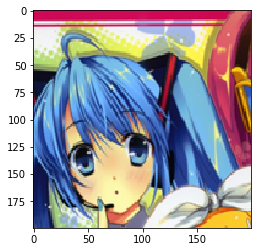

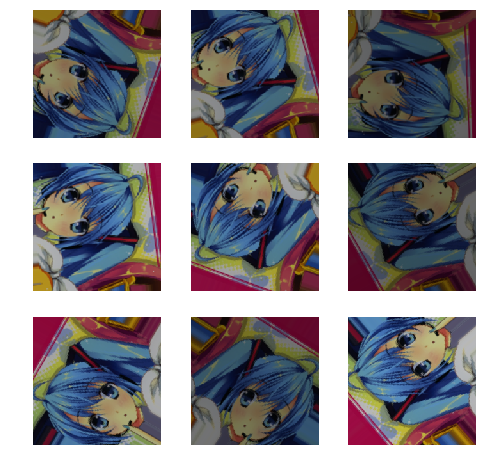

[[[0.24313727 0.38431376 0.5568628 ]
  [0.24313727 0.38431376 0.5568628 ]
  [0.27058825 0.42352945 0.6039216 ]
  ...
  [0.3372549  0.32156864 0.41960788]
  [0.33333334 0.32156864 0.427451  ]
  [0.33333334 0.32156864 0.427451  ]]

 [[0.18823531 0.3137255  0.47058827]
  [0.24313727 0.38431376 0.5568628 ]
  [0.24705884 0.38823533 0.5647059 ]
  ...
  [0.33333334 0.32156864 0.427451  ]
  [0.33333334 0.32156864 0.427451  ]
  [0.33333334 0.32156864 0.427451  ]]

 [[0.10980393 0.20784315 0.34117648]
  [0.20392159 0.33333334 0.49411768]
  [0.24313727 0.38431376 0.5568628 ]
  ...
  [0.33333334 0.32156864 0.427451  ]
  [0.33333334 0.32156864 0.427451  ]
  [0.33333334 0.3254902  0.427451  ]]

 ...

 [[0.60784316 0.03529412 0.25490198]
  [0.60784316 0.03921569 0.25490198]
  [0.60784316 0.03921569 0.25490198]
  ...
  [0.39607847 0.13725491 0.12941177]
  [0.36078432 0.09019608 0.20000002]
  [0.3529412  0.08627451 0.20784315]]

 [[0.60784316 0.03921569 0.25490198]
  [0.60784316 0.03921569 0.25490198]


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#kerasインポート
from keras.models import model_from_json
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, array_to_img, load_img, random_rotation, random_zoom, random_shift
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils


%matplotlib inline

#------------変数宣言------------
img_size = 200

#csvのファイルパスを記載
csv_filepath = 'filename_test.csv'

#水増し処理の種類を記載
img_add = 9

#------------処理ここから------------


#csvからファイルパスを読み込む
csv_file = pd.read_csv(csv_filepath, encoding="UTF-8")#もしくわUTF-8

#csvに記載しているファイルパス、ラベル、総数を格納
fnames = csv_file['filepath']
labels = csv_file['label']
fnames_total = len(fnames)

#データセットを格納する変数の初期化
img_train = np.zeros((fnames_total,img_size,img_size,3))

#データセットの格納
#前処理する場合はここでやる
for i,fname in enumerate(fnames):

    temp_img = load_img(fname,target_size=(img_size,img_size))
    #配列に格納する
    img_train[i] = img_to_array(temp_img)

#水増し前の画像の表示
plt.imshow(img_train[0]/255)
plt.show()

#水増し処理を行う
#ImageDataGeneratorの生成
datagen = ImageDataGenerator(
    rescale=1. / 255,    #正規化
    rotation_range=180,    #回転
    vertical_flip=True,    #上下#反転
    horizontal_flip=True,    #左右反転
    brightness_range=[0.3, 1.0]    #明度調整 0だと暗く、1だと明るい
)

gen = datagen.flow(img_train, batch_size=fnames_total) 

# Python ジェネレーターで9枚生成して、表示する。
plt.figure(figsize=(8, 8))
for i in range(img_add):
    batches = next(gen)  # (NumBatches, Height, Width, Channels) の4次元データを返す。
    # 画像として表示するため、3次元データにし、float から uint8 にキャストする。
    gen_img = batches[0]

    plt.subplot(3, 3, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
plt.show()
print(gen_img)